In [1]:
#Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in the merged dataframe files
merge1 = pd.read_csv("data_source/merge_data/public_education_cpi.csv")
public_education_cpi = pd.DataFrame(merge1)
public_education_cpi.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,CPI
0,4,Government Expenditure,Afghanistan,2010,17.07,General,100.00
1,4,Government Expenditure,Afghanistan,2015,12.51,General,132.12
2,4,Government Expenditure,Afghanistan,2017,15.66,General,144.77
3,8,Government Expenditure,Albania,2005,11.36,General,86.67
4,8,Government Expenditure,Albania,2015,11.32,General,111.40


In [3]:
merge2 = pd.read_csv("data_source/merge_data/public_education_crime.csv")
public_education_crime = pd.DataFrame(merge2)
public_education_crime.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,"Rate per 100,000"
0,4,Government Expenditure,Afghanistan,2010,17.07,Homicide (%),3.4
1,8,Government Expenditure,Albania,2005,11.36,Homicide (%),5.0
2,8,Government Expenditure,Albania,2005,11.36,Assault (%),5.4
3,8,Government Expenditure,Albania,2005,11.36,Theft (%),97.0
4,8,Government Expenditure,Albania,2005,11.36,Robbery (%),6.5


In [4]:
merge3 = pd.read_csv("data_source/merge_data/public_education_gdp.csv")
public_education_gdp = pd.DataFrame(merge3)
public_education_gdp.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,GDP
0,4,Government Expenditure,Afghanistan,2010,17.07,Per Capita,558.0
1,4,Government Expenditure,Afghanistan,2015,12.51,Per Capita,611.0
2,4,Government Expenditure,Afghanistan,2017,15.66,Per Capita,619.0
3,8,Government Expenditure,Albania,2005,11.36,Per Capita,2615.0
4,8,Government Expenditure,Albania,2015,11.32,Per Capita,3895.0


In [5]:
merge4 = pd.read_csv("data_source/merge_data/public_education_gdp_percent.csv")
public_education_gdp_percent = pd.DataFrame(merge4)
public_education_gdp_percent.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,GDP


In [6]:
merge5 = pd.read_csv("data_source/merge_data/public_education_labor.csv")
public_education_labor = pd.DataFrame(merge5)
public_education_labor.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,Unemployment Rate (%)
0,4,Government Expenditure,Afghanistan,2010,17.07,Total Unemployment,7.8
1,4,Government Expenditure,Afghanistan,2015,12.51,Total Unemployment,8.9
2,8,Government Expenditure,Albania,2005,11.36,Total Unemployment,17.5
3,8,Government Expenditure,Albania,2015,11.32,Total Unemployment,17.1
4,24,Government Expenditure,Angola,2005,7.99,Total Unemployment,21.4


In [7]:
merge6 = pd.read_csv("data_source/merge_data/public_education_rnd_gdp.csv")
public_education_rnd_gdp = pd.DataFrame(merge6)
public_education_rnd_gdp.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,Expenditure on R&D (%)
0,32,Government Expenditure,Argentina,2005,15.81,Higher education (%),5.7
1,40,Government Expenditure,Austria,2015,10.69,Higher education (%),0.6
2,31,Government Expenditure,Azerbaijan,2005,13.22,Higher education (%),0.0
3,31,Government Expenditure,Azerbaijan,2010,8.70,Higher education (%),0.3
4,31,Government Expenditure,Azerbaijan,2016,8.20,Higher education (%),1.4


Bar Chart and Scatter Plot for each variable


# Education Expense v CPI Analysis 

We calculated the mean of the top ten countries in terms of Education Percent Spent compared to their Consumer Price Index. The mean CPI of all countries is 142.67 after 2010. 

The amount of Education Spent is relatively the same among the top ten, regardless of CPI. Only one country was greater than the mean, indicating that there is no relationship between education spent and CPI.

The calculated standard deviation large indicating that the data is very spead out.  

<Figure size 5760x432 with 0 Axes>

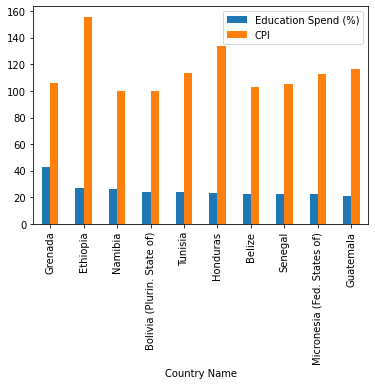

The mean for the merged data set is: 142.67
The standard deviation for the merged data set is: 304.24


In [41]:
#Bar and Scatter Chart for Education Expense v CPI. 

#Eliminate data prior to 2010
public_education_cpi_clean = public_education_cpi.loc[(public_education_cpi["Year"]>2009)]
#Find the mean for Public Education Expense and CPI and create merged dataframe 
public_education_expense_mean = public_education_cpi_clean.groupby('Country Name').mean()['Education Spend (%)']
cpi_mean = public_education_cpi_clean.groupby('Country Name').mean()['CPI']
education_expense_cpi_df = pd.merge(public_education_expense_mean, cpi_mean, on='Country Name')
education_expense_cpi_df = education_expense_cpi_df.nlargest(10,"Education Spend (%)")



#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_cpi_df.plot.bar()
plt.show()

public_education_cpi_mean = public_education_cpi_clean['CPI'].mean()
print(f'The mean for the merged data set is: {round(public_education_cpi_mean, 2)}')

#Standard Deviation
public_education_cpi_std = public_education_cpi_clean['CPI'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_cpi_std, 2)}')

The correlation coefficient is: 0.0048


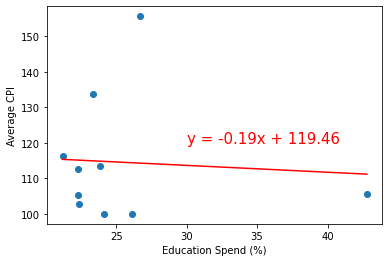

In [67]:
#Linear Regression and Correlation Coefficient - CPI
x_values = education_expense_cpi_df['Education Spend (%)']
y_values = education_expense_cpi_df["CPI"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,120), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average CPI')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

# Education Expense v Crime Analysis

## Homicide rates in relation to education expense:


We can see that our outliers are: Honduras and Belize, who are well over our mean of 6.94

There is no significant correlation between education expenditure and a countires homicide rates. Eventhough Grenada spent more overall in education, their homicide rate is still similar to those of other countries that spent 2/3 of what they did.



<Figure size 8640x288 with 0 Axes>

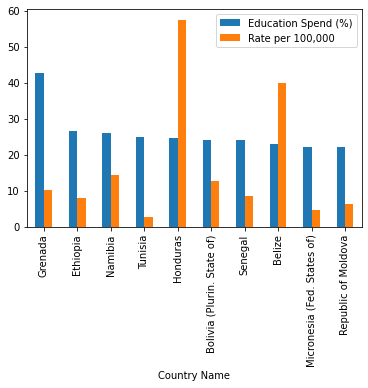

The mean for the merged data set is: 6.94
The standard deviation for the merged data set is: 11.6


In [43]:
#Bar and Scatter Chart for Education Expense v Homicide Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and homicide and create merged dataframe 
public_education_homicide_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Homicide (%)')].dropna()
education_expense_homicide_mean = public_education_homicide_clean.groupby('Country Name').mean()['Education Spend (%)']
homicide_mean = public_education_homicide_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_homicide_df = pd.merge(education_expense_homicide_mean, homicide_mean, on='Country Name')
education_expense_homicide_df = education_expense_homicide_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (120,4))
education_expense_homicide_df.plot.bar()
plt.show()

public_education_homicide_mean = public_education_homicide_clean['Rate per 100,000'].mean()

print(f'The mean for the merged data set is: {round(public_education_homicide_mean, 2)}')

#Standard Deviation
public_education_homicide_std = public_education_homicide_clean['Rate per 100,000'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_homicide_std, 2)}')

The correlation coefficient is: 0.0148


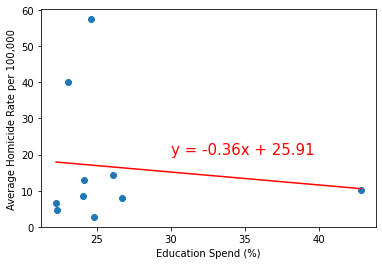

In [66]:
#Linear Regression and Correlation Coefficient - Homicide
x_values = education_expense_homicide_df['Education Spend (%)']
y_values = education_expense_homicide_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,20), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Homicide Rate per 100,000')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

## Theft rates in relation to education expense:

Chile and Hong Kong are our outliers.

All other countries are relatively low.

The mean is 322 and Chile is almost hitting 1000.


There is no significant correlation between education expenditure and a countries theft rates.
	
The scatter plot shows crime rate to be unrelated to education expenditure. Despite some countries spending similar amounts in education, their theft rates differ 	greatly.


<Figure size 5760x432 with 0 Axes>

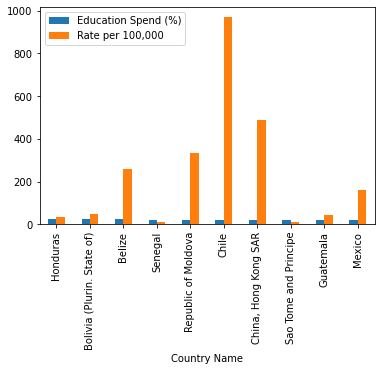

The mean for the merged data set is: 322.35
The standard deviation for the merged data set is: 307.0


In [44]:
#Bar and Scatter Chart for Education Expense v Theft Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and theft and create merged dataframe 
public_education_theft_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Theft (%)')].dropna()
education_expense_theft_mean = public_education_theft_clean.groupby('Country Name').mean()['Education Spend (%)']
theft_mean = public_education_theft_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_theft_df = pd.merge(education_expense_theft_mean, theft_mean, on='Country Name')
education_expense_theft_df = education_expense_theft_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_theft_df.plot.bar()
plt.show()

public_education_theft_mean = public_education_theft_clean['Rate per 100,000'].mean()

print(f'The mean for the merged data set is: {round(public_education_theft_mean, 2)}')

#Standard Deviation
public_education_theft_std = public_education_theft_clean['Rate per 100,000'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_theft_std, 2)}')

The correlation coefficient is: 0.0199


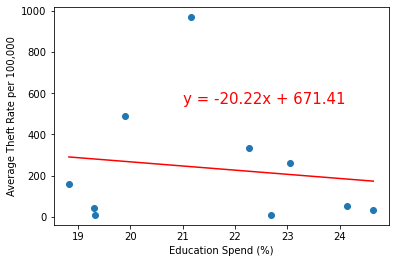

In [65]:
#Linear Regression and Correlation Coefficient - Theft
x_values = education_expense_theft_df['Education Spend (%)']
y_values = education_expense_theft_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(21,550), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Theft Rate per 100,000')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

## Assault rates in relation to education expense:

There is no significant correlation between education expenditure and assault rates. 

The scatter plot shows assault rates to be unrelated to education expenditure.

<Figure size 5760x432 with 0 Axes>

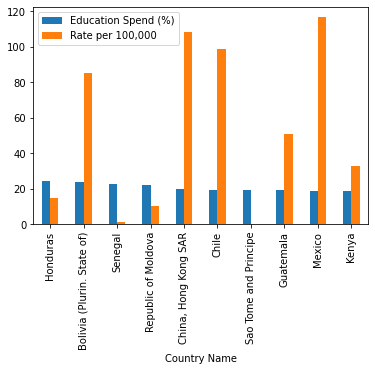

The mean for the merged data set is: 115.16
The standard deviation for the merged data set is: 177.47


In [45]:
#Bar and Scatter Chart for Education Expense v Assault Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and assault and create merged dataframe 
public_education_assault_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Assault (%)')].dropna()
education_expense_assault_mean = public_education_assault_clean.groupby('Country Name').mean()['Education Spend (%)']
assault_mean = public_education_assault_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_assault_df = pd.merge(education_expense_assault_mean, assault_mean, on='Country Name')
education_expense_assault_df = education_expense_assault_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_assault_df.plot.bar()
plt.show()

public_education_assault_mean = public_education_assault_clean["Rate per 100,000"].mean()

print(f'The mean for the merged data set is: {round(public_education_assault_mean, 2)}')

#Standard Deviation
public_education_assault_std = public_education_assault_clean['Rate per 100,000'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_assault_std, 2)}')

The correlation coefficient is: 0.1036


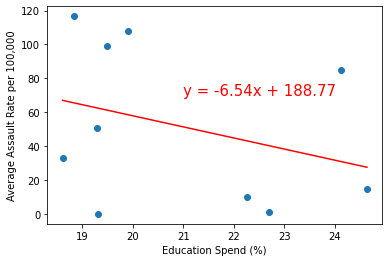

In [64]:
#Linear Regression and Correlation Coefficient - Assault
x_values = education_expense_assault_df['Education Spend (%)']
y_values = education_expense_assault_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(21,70), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Assault Rate per 100,000')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

## Robbery rates in relation to education expense:

There is no significant correlation between education expense and robbery rates. 

The scatter plot shows Chile be an outlier by having a robbery rate of 5 times greater than other countries despite having similar expenditure on education.

<Figure size 5760x432 with 0 Axes>

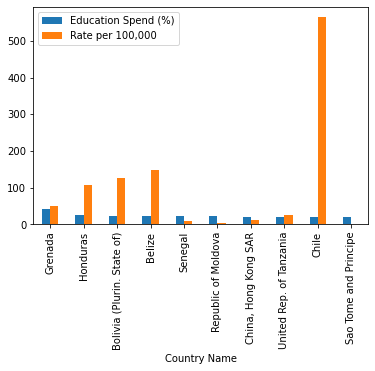

The mean for the merged data set is: 84.79
The standard deviation for the merged data set is: 144.34


In [46]:
#Bar and Scatter Chart for Education Expense v Robbery Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and robbery and create merged dataframe 
public_education_robbery_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Robbery (%)')].dropna()
education_expense_robbery_mean = public_education_robbery_clean.groupby('Country Name').mean()['Education Spend (%)']
robbery_mean = public_education_robbery_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_robbery_df = pd.merge(education_expense_robbery_mean, robbery_mean, on='Country Name')
education_expense_robbery_df = education_expense_robbery_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_robbery_df.plot.bar()
plt.show()

public_education_robbery_mean = public_education_robbery_clean['Rate per 100,000'].mean()

print(f'The mean for the merged data set is: {round(public_education_robbery_mean, 2)}')

#Standard Deviation
public_education_robbery_std = public_education_robbery_clean['Rate per 100,000'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_robbery_std, 2)}')

The correlation coefficient is: 0.0225


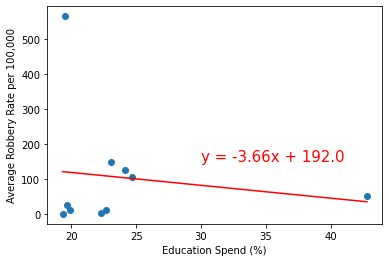

In [63]:
#Linear Regression and Correlation Coefficient - Robbery
x_values = education_expense_robbery_df['Education Spend (%)']
y_values = education_expense_robbery_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,150), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Robbery Rate per 100,000')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

# Sexual violence rates in relation to education expense:

There is no correlation between a countries expenditure on education and sexual violence rates.

The scatter plot shows that countries that have similar expenditure in education, differ greatly in their sexual violence rates.

Countries are close to the mean 

<Figure size 5760x432 with 0 Axes>

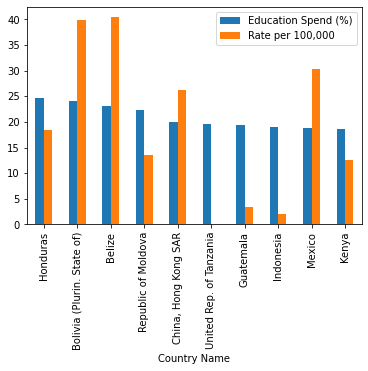

The mean for the merged data set is: 32.05
The standard deviation for the merged data set is: 33.66


In [47]:
#Bar and Scatter Chart for Education Expense v Sexual Violence Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and sexual violence and create merged dataframe 
public_education_sex_violence_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Sexual Violence (%)')].dropna()
education_expense_sex_violence_mean = public_education_sex_violence_clean.groupby('Country Name').mean()['Education Spend (%)']
sex_violence_mean = public_education_sex_violence_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_sex_violence_df = pd.merge(education_expense_sex_violence_mean, sex_violence_mean, on='Country Name')
education_expense_sex_violence_df = education_expense_sex_violence_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_sex_violence_df.plot.bar()
plt.show()

public_education_sex_violence_mean = public_education_sex_violence_clean['Rate per 100,000'].mean()

print(f'The mean for the merged data set is: {round(public_education_sex_violence_mean, 2)}')

#Standard Deviation
public_education_sex_violence_std = public_education_sex_violence_clean['Rate per 100,000'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_sex_violence_std, 2)}')

The correlation coefficient is: 0.2813


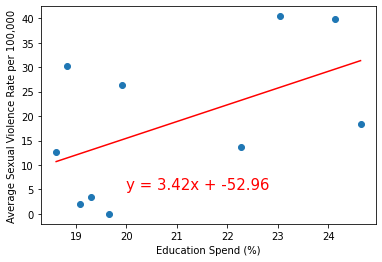

In [62]:
#Linear Regression and Correlation Coefficient - Sexual Violence 
x_values = education_expense_sex_violence_df['Education Spend (%)']
y_values = education_expense_sex_violence_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(20,5), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Sexual Violence Rate per 100,000')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

# Kidnapping rates in relation to education expense:

Education expenditure has the strongest correlation with kidnapping rates in a country out of all the crime we analyzed. 

<Figure size 5760x432 with 0 Axes>

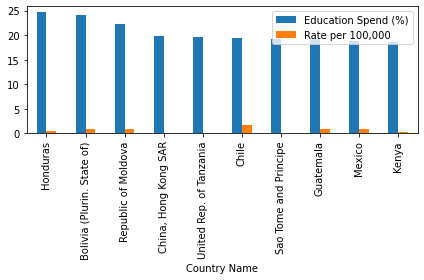

The mean for the merged data set is: 1.83
The standard deviation for the merged data set is: 2.74


In [48]:
#Bar and Scatter Chart for Education Expense v Kidnapping Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and kidnapping and create merged dataframe 
public_education_kidnapping_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Kidnapping (%)')].dropna()
education_expense_kidnapping_mean = public_education_kidnapping_clean.groupby('Country Name').mean()['Education Spend (%)']
kidnapping_mean = public_education_kidnapping_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_kidnapping_df = pd.merge(education_expense_kidnapping_mean, kidnapping_mean, on='Country Name')
education_expense_kidnapping_df = education_expense_kidnapping_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_kidnapping_df.plot.bar()
plt.tight_layout()
plt.show()

public_education_kidnapping_mean = public_education_kidnapping_clean['Rate per 100,000'].mean()

print(f'The mean for the merged data set is: {round(public_education_kidnapping_mean, 2)}')

#Standard Deviation
public_education_kidnapping_std = public_education_kidnapping_clean['Rate per 100,000'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_kidnapping_std, 2)}')

The correlation coefficient is: 0.0197


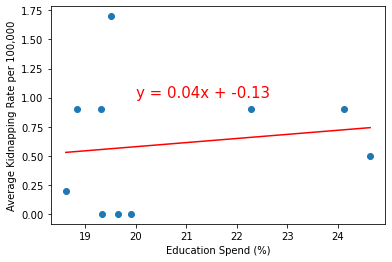

In [61]:
#Linear Regression and Correlation Coefficient - Kidnapping
x_values = education_expense_kidnapping_df['Education Spend (%)']
y_values = education_expense_kidnapping_df["Rate per 100,000"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(20,1), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Kidnapping Rate per 100,000')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

# Education Expense v GDP

This has the strongest correlation, with one outlier Grenada. 

There's a clustering at the bottom of the scatter plot. There are two distinct groups, and the correlation may be skewed. 


<Figure size 5760x432 with 0 Axes>

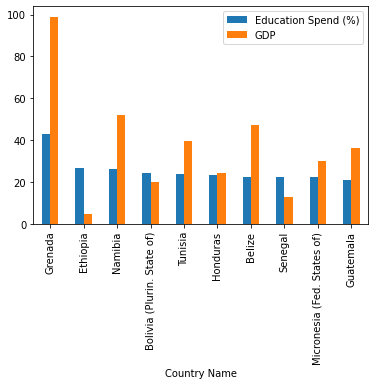

The mean for the merged data set is: 13930.69
The standard deviation for the merged data set is: 19424.74


In [50]:
#Bar and Scatter Chart for Education Expense v GDP. 

#Eliminate data prior to 2010
public_education_gdp_clean = public_education_gdp.loc[(public_education_gdp["Year"]>2009)]
#Find the mean for Public Education Expense and GDP and create merged dataframe 
public_education_expense_gdp_mean = public_education_gdp_clean.groupby('Country Name').mean()['Education Spend (%)']
gdp_mean = public_education_gdp_clean.groupby('Country Name').mean()['GDP']/100
education_expense_gdp_df = pd.merge(public_education_expense_gdp_mean, gdp_mean, on='Country Name')
education_expense_gdp_df = education_expense_gdp_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_gdp_df.plot.bar()
plt.show()

public_education_gdp_mean = public_education_gdp_clean['GDP'].mean()

print(f'The mean for the merged data set is: {round(public_education_gdp_mean, 2)}')

#Standard Deviation
public_education_gdp_std = public_education_gdp_clean['GDP'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_gdp_std, 2)}')

The correlation coefficient is: 0.5924


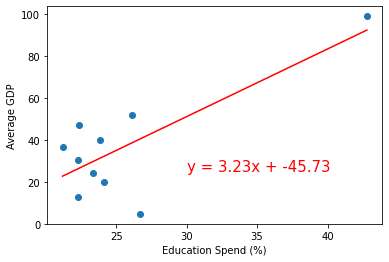

In [60]:
#Linear Regression and Correlation Coefficient - GDP
x_values = education_expense_gdp_df['Education Spend (%)']
y_values = education_expense_gdp_df["GDP"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(30,25), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average GDP')


coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()

No Data for GDP Percent - Given the filtering for top countries there was no data for GDP Percent


# Education Expense v Unemployment Rate

Education expenditure is independent from the rate of unemployment. 

We expected that there would be some relation to education expenditure and a lower rate of unemployment, but our data shows that there is no correlation. 

<Figure size 5760x432 with 0 Axes>

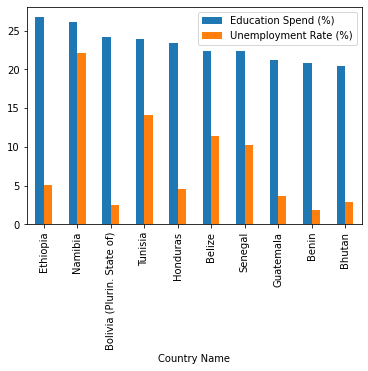

The mean for the merged data set is: 8.04
The standard deviation for the merged data set is: 5.31


In [51]:
#Bar and Scatter Chart for Education Expense v Unemployment Rate. 

#Eliminate data prior to 2010
public_education_labor_clean = public_education_labor.loc[(public_education_labor["Year"]>2009)]
#Find the mean for Public Education Expense and the unemployment rate and create merged dataframe 
public_education_expense_labor_mean = public_education_cpi_clean.groupby('Country Name').mean()['Education Spend (%)']
labor_mean = public_education_labor_clean.groupby('Country Name').mean()['Unemployment Rate (%)']
education_expense_labor_df = pd.merge(public_education_expense_mean, labor_mean, on='Country Name')
education_expense_labor_df = education_expense_labor_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_labor_df.plot.bar()
plt.show()

public_education_labor_mean = public_education_labor_clean['Unemployment Rate (%)'].mean()

print(f'The mean for the merged data set is: {round(public_education_labor_mean, 2)}')

#Standard Deviation
public_education_labor_std = public_education_labor_clean['Unemployment Rate (%)'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_labor_std, 2)}')

The correlation coefficient is: 0.2454


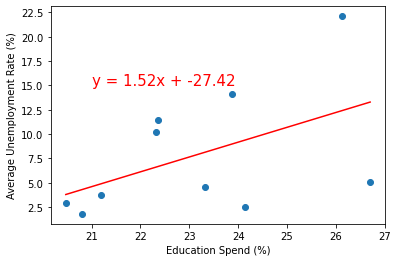

In [59]:
#Linear Regression and Correlation Coefficient - Labor 
x_values = education_expense_labor_df['Education Spend (%)']
y_values = education_expense_labor_df["Unemployment Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(21,15), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Unemployment Rate (%)')

coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")

plt.show()

# Education Expense v R&D

Guatemala has the highest spending in R&D. 

<Figure size 5760x432 with 0 Axes>

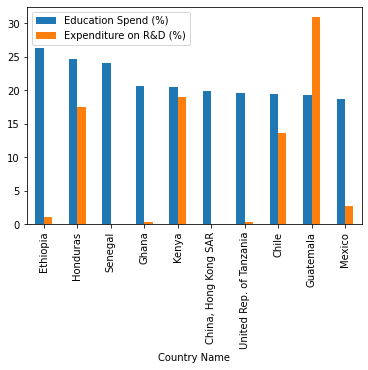

The mean for the merged data set is: 4.81
The standard deviation for the merged data set is: 8.39


In [53]:
#Bar and Scatter Chart for Education Expense v R&D

#Eliminate data prior to 2010
public_education_rnd_clean = public_education_rnd_gdp.loc[(public_education_rnd_gdp["Year"]>2009)]
#Find the mean for Public Education Expense and R&D and create merged dataframe 
public_education_expense_rnd_mean = public_education_rnd_clean.groupby('Country Name').mean()['Education Spend (%)']
rnd_mean = public_education_rnd_clean.groupby('Country Name').mean()['Expenditure on R&D (%)']
education_expense_rnd_df = pd.merge(public_education_expense_rnd_mean, rnd_mean, on='Country Name')
education_expense_rnd_df = education_expense_rnd_df.nlargest(10,"Education Spend (%)")

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_rnd_df.plot.bar()
plt.show()

public_education_rnd_mean = public_education_rnd_clean['Expenditure on R&D (%)'].mean()

print(f'The mean for the merged data set is: {round(public_education_rnd_mean, 2)}')

#Standard Deviation
public_education_rnd_std = public_education_rnd_clean['Expenditure on R&D (%)'].std()
print(f'The standard deviation for the merged data set is: {round(public_education_rnd_std, 2)}')

The correlation coefficient is: 0.0317


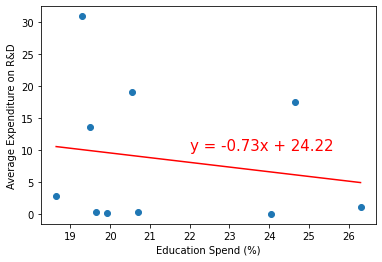

In [58]:
#Linear Regression and correlation coefficient - R&D
x_values = education_expense_rnd_df['Education Spend (%)']
y_values = education_expense_rnd_df['Expenditure on R&D (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq,(22,10), fontsize=15, color='r')
plt.xlabel('Education Spend (%)')
plt.ylabel('Average Expenditure on R&D')

coefficient = rvalue**2
print(f"The correlation coefficient is: {round(coefficient,4)}")
plt.show()